# NGSC and SMR integrated energy system baseline example and costing anaylsis

Steam Methane Reforming (SMR) is a widely used industrial process for producing hydrogen gas from natural gas. The process involves reacting natural gas (methane) with steam at high temperatures (800-1000°C) and under pressure (20-30 bar) in the presence of a catalyst to produce hydrogen gas (H2) and carbon monoxide (CO). The reaction is endothermic and requires a large amount of heat, which is usually supplied by burning a portion of the natural gas. A Natural Gas Simple Cycle (NGSC) power plant is a type of gas turbine power plant that operates by burning natural gas in a combustion chamber to produce high-pressure gas that drives a turbine. The turbine is connected to a generator, which produces electricity. NGSC plants are known for their high efficiency and low emissions, making them an attractive choice for power generation.

 

Integrating a small 115 MW NGSC gas turbine with an SMR-based hydrogen plant involves using the excess heat from the NGSC plant to provide the energy required for the SMR process. In this configuration, the NGSC plant is used to generate electricity, while the SMR plant produces hydrogen gas. The high-temperature exhaust gases from the NGSC turbine are passed through a heat exchanger, which preheats the natural gas and steam required for the SMR reaction. This preheating reduces the amount of energy required for the SMR process and increases the overall efficiency of the system.

 

The size of the gas turbine for the NGSC+SMR configuration is determined such that the flow rate of the gas turbine exhaust is high enough such that the flue gas formed after the combustion with the tail gas and the supplementary natural gas contains about 1.7% of O2 by volume at the full turbine load operating condition. Note that at a low load condition with turbine exhaust flow reduced, additional air is supplied to the SMR furnace such that the O2 in the final flue gas stream is no less than 1.7 vol %. The size of the gas turbine for the NGCC+SMR configuration is much larger than the NGSC+SMR case. For the NGCC+SMR configuration, the flow rate of the turbine exhaust is high enough to provide sufficient O2 for the combustion of tail gas and supplementary natural gas even at the partial gas turbine loads.

 

The hydrogen gas produced by the SMR plant can be used for a variety of applications, including fuel cell vehicles, chemical production, and power generation. By integrating the NGSC and SMR plants, a more efficient and cost-effective method for producing hydrogen can be achieved, which can help to reduce greenhouse gas emissions and support the transition to a low-carbon energy system.
	


## 1. Import the NGSC + SMR  process model

In [1]:
from ngsc_plus_smr_ies import get_full_plant_model as build_ngsc_plus_smr_ies

## 2. Build the NGSC + SMR process simualtion

In [2]:
ies_model = build_ngsc_plus_smr_ies()

Ipopt 3.13.2: tol=1e-07
linear_solver=ma27
max_iter=120
bound_push=1e-16


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes 

## 3. Display the Process Flowsheet Diagram of the NGSC + SMR process

The figure shows the block flow diagram of the IES combining NGSC and SMR plant. The preheated natural gas and steam are mixed and introduced to the SMR reactor where reforming reactions take place to form syngas, which is cooled by a syngas cooler downstream of the reactor. The cooled syngas goes through a train of water gas shift reactors to produce more hydrogen gas. The syngas is then cooled further in another syngas cooler (WGSR cooler as shown in the figure) and the water vapor in the syngas is condensed in a series of water knockout condensers. The CO2 in the remaining syngas is then captured by the MDEA pre-combustion capture system. The H2 in the remaining syngas stream is purified by a pressure swing adsorber (PSA) to produce the final hydrogen product. The tail gas stream from the PSA which contains unconverted CH4, CO, and remaining H2 is used as the fuel along with the supplementary natural gas for the combustion in the SMR furnace. The exhaust of the gas turbine, which contains more than 10 vol% of O2, replaces air as the oxidizing agent for the combustion. The flue gas leaving the furnace enters a heat recovery system that preheats the natural gas to be reformed and generates both the intermediate-pressure (MP) steam required for the reforming reactions and the low-pressure (LP) steam to provide reboiler duty for pre- and post-combustion CO2 captures. After the heat recovery section, the flue gas enters a post-combustion carbon capture system. The captured CO2 is combined with the CO2 product of the pre-combustion capture system and eventually goes through a compression and purification unit (CPU) before being sent to the pipeline for utilization and storage. Multiple heat exchangers are also used to recover the heat in the syngas stream before and after the water gas shift reactor and to knockout excess water in the syngas such that it can be recycled back to the SMR reactor. To generate the MP steam, the makeup feed water is pumped by an MP pump, heated up by the syngas in an MP knockout condenser and then combined with the liquid water knocked out by the MP knockout condenser itself, an LP knockout condenser and another knockout condenser cooled by cooling water. An MP booster pump is used to increase the water pressure such that it can recycled back to the SMR reactor. The water stream after the booster pump is then heated by the flue gas in an MP economizer before vaporized and superheated by the flue gas leaving the SMR furnace. To generate the LP steam, the condensate from the reboilers of the pre- and post-combustion capture systems is pumped by an LP booster pump, heated by the syngas in the LP knockout condenser and the syngas cooler after the water gas shift reactor (WGSR cooler). The LP water is then vaporized in the syngas cooler after the SMR reactor and an LP flue gas cooler. The natural gas feedstock is first preheated in the first preheater (NG Preheat1) by the flue gas leaving the MP economizer and then heated in the second preheater (NG Preheat2) by the flue gas leaving the MP flue gas cooler. The preheated natural gas mixes with the superheated MP steam before entering the tube side of the SMR reactor. Note that at low gas turbine load conditions, certain amount of ambient air is fed to the SMR furnace to provide enough O2 for the combustion and to maintain the mole fraction of O2 in the flue gas at 0.017. The ambient air to the SMR furnace is not needed at the full load condition. Notice that this IES configuration has one pre-combustion capture system and one post-combustion capture system.

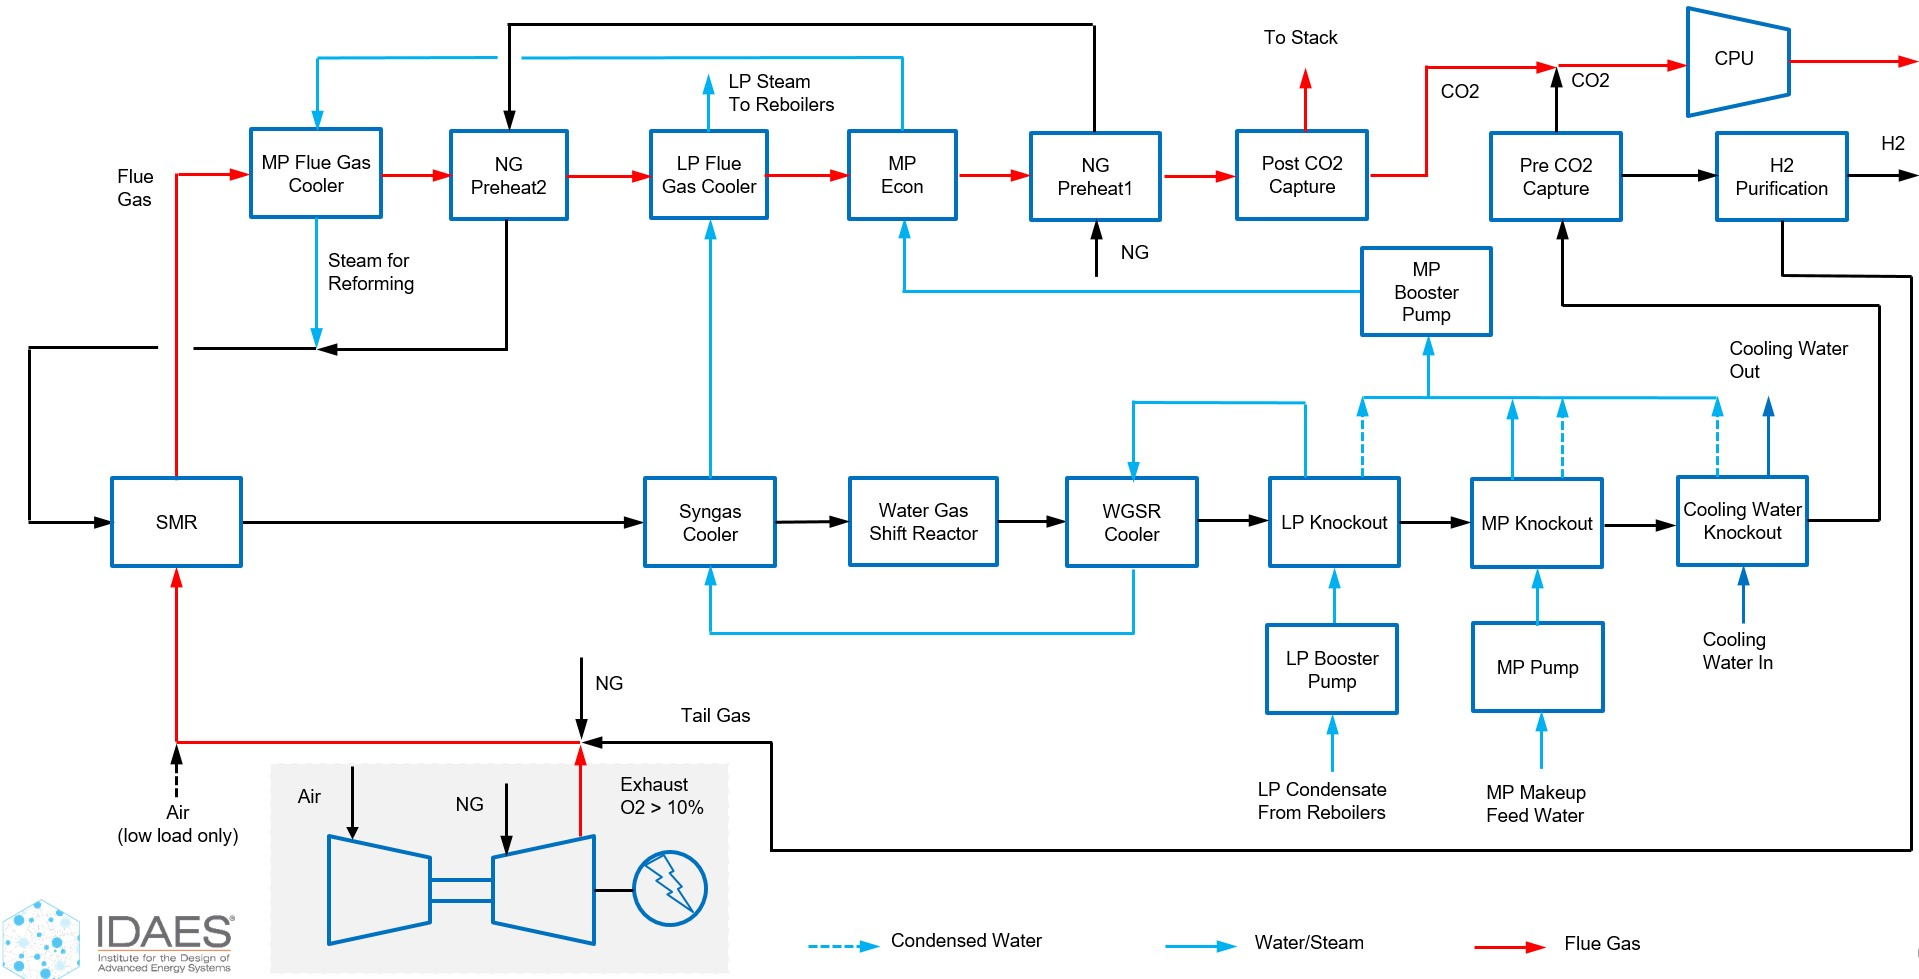

In [3]:
from IPython.display import display, Image
display(Image(filename = "ngsc_smr_pfd.jpg"))

## 4.Display the results summary of process simulation

In [4]:
import pandas as pd
import pyomo.environ as pyo

m = ies_model
res = pd.DataFrame(index = ['values'])

res['Net power MW'] = round(pyo.value(-m.fs.gt_net_power[0]/1e6)-46.73,2)
    
res['H2 production Rate (kg/hr)'] = round(
                                    pyo.value(m.fs.h2_separator.h2_outlet.flow_mol[0]*m.fs.h2_separator.h2_outlet_state[0].mw)*3600
                                    ,2)
res['CO2 Product from Pre-combustion Capture (kg/hr)'] = round(
                                                         pyo.value(m.fs.co2_pre_separator.co2_outlet_state[0].flow_mol*m.fs.co2_pre_separator.co2_outlet_state[0].mole_frac_comp['CO2']*44*3.6)
                                                         ,2)

res['CO2 Product from Post-combustion Capture (kg/hr)'] = round(
                                                         pyo.value(m.fs.smr_shell.outlet.flow_mol[0]*m.fs.smr_shell.outlet.mole_frac_comp[0,'CO2']*0.97*44*3.6)
                                                         ,2)
res['Flue Gas Flow Rate (kg/s)'] =  round(
                                    pyo.value(m.fs.smr_shell.outlet.flow_mol[0]*m.fs.smr_shell.control_volume.properties_out[0].mw)
                                   ,2)
res['Natural Gas Feed Rate to SMR As Reactant (kg/hr)'] = round(
                                              pyo.value(m.fs.ng_preheat1.tube_inlet.flow_mol[0]*16.5143*3.6)
                                             ,2)
res['Natural Gas Feed Rate to SMR Furnace As Fuel (kg/hr)'] =round(
                                             pyo.value(m.fs.smr_shell_mix.fuel_inlet.flow_mol[0]*16.5143*3.6)
                                            ,2)
res['Natural Gas Feed Rate to Gas Turbine (kg/hr)'] =  round(
                                               pyo.value(m.fs.gt_mix.fuel_inlet_state[0].flow_mol*16.5143*3.6)
    ,2)

res.T

,values
Net power MW,68.22
H2 production Rate (kg/hr),20110.57
CO2 Product from Pre-combustion Capture (kg/hr),123947.67
CO2 Product from Post-combustion Capture (kg/hr),98925.46
Flue Gas Flow Rate (kg/s),233.59
Natural Gas Feed Rate to SMR As Reactant (kg/hr),60888.42
Natural Gas Feed Rate to SMR Furnace As Fuel (kg/hr),3528.25
Natural Gas Feed Rate to Gas Turbine (kg/hr),21604.67


validate the simulation results for testing

In [5]:
import pytest
assert res.at['values','H2 production Rate (kg/hr)'] == pytest.approx(20110.57,rel = 1e-8)
assert res.at['values','Flue Gas Flow Rate (kg/s)'] == pytest.approx(233.59,rel = 1e-8)

store the process simulation results

In [6]:
import pandas as pd
import os
result = pd.DataFrame()
result['h2'] = res['H2 production Rate (kg/hr)'] 
result['power'] = pyo.value(-m.fs.gt_net_power[0]/1e6)
result['co2'] = res['CO2 Product from Post-combustion Capture (kg/hr)']
result['ng'] = -(res['Natural Gas Feed Rate to SMR As Reactant (kg/hr)'] +
                 res['Natural Gas Feed Rate to SMR Furnace As Fuel (kg/hr)'] +
                 res['Natural Gas Feed Rate to Gas Turbine (kg/hr)'] )
result['fg'] =  res['Flue Gas Flow Rate (kg/s)']
path = 'result/case3t.csv'
if not os.path.exists(path):
    result.T.to_csv(path)

## 5. Run the costing analysis of the NGSC + SMR process

In this work, a sophisticated bottom-up costing framework is built by implementing the methodology originally proposed by National Energy Technology Laboratory (NETL). The NETL costing methodology has been successfully applied in various applications from different types of power plants to hydrogen generation plants. Detailed information about NETL costing methodology is available in the 2019 revision of the Quality Guidelines for Energy System Studies (QGESS) document titled “Cost Estimation Methodology for NETL Assessment of Power Plant Performance.” (Theis, 2019) https://www.osti.gov/biblio/1567736

Import existing functions in the costing.py file and get them ready to use for the costing analysis later

In [7]:
from costing import *

The first step before start to doing the costing analysis is to set the background of the case, which includes the name of the plant and the assumed the capacity factor. In this example, we set the capacity of the NGSC + SMR plant as 100 %. 

In [8]:
plant = Plant('smr_ngsc', 1)

The second step is to prepare other data for the costing analysis in this case. The assumed power price and fuel price are stored in the price files. They are fixed for the costing analysis in this step. But we will demonstrate the way to release them as degrees of freedoms in the later section. 

In [9]:
case = plant.type
cf = plant.cf
for i in range(len(read_data(plant.files()[case]))):    
    product = pd.read_csv("reference/product.csv", header= 0, index_col = [0,1])
    if case is not None: 
        product[case] = read_data(plant.files()[case])[i]
    product.loc[['co2']] = product.loc[['co2']] /1000
    product.loc[['ng']] = product.loc[['ng']] * 49565.84/1e6
    product.reset_index(inplace = True)
    product.set_index('item',inplace = True,drop = True)
    price = pd.read_csv('reference/price.csv', header = 0, index_col = 0)
    total = pd.DataFrame()
    for col in product.drop('unit', axis = 1).columns:
        for index in price.instant.index:
            total.at[index,col] = product[col][index] * price.instant[index]*24*365/1e6

Based on the input information defined so far, the costing was completed and the levelized cost of hydrogen was used in this work as the key index.

In [10]:
co2 = 123947.67+98925.46
cost= cost_cal(case)
summary = cost_sum(product,total,cost,case,cf)
LCOH = LCOH_cal(summary, product,cf,case,co2)  

## 6. Summary of costing results using LCOH

Levelized Cost of Hydrogen (LCOH) is a widely used metric to compare the costs of different hydrogen production technologies. LCOH represents the cost of producing one kilogram of hydrogen over the lifetime of the production plant, taking into account all capital costs, operating costs, and the present value of future costs. It is expressed in units of currency per kilogram of hydrogen ($/kg H2).

The calculation of LCOH involves estimating the total costs of the hydrogen production plant over its lifetime, including the investment costs for construction and equipment, the operating costs for materials, labor, energy, and maintenance, and the costs associated with the end-of-life decommissioning of the plant. These costs are then divided by the total amount of hydrogen produced over the lifetime of the plant to obtain the LCOH.

LCOH is a useful metric for comparing different hydrogen production technologies because it accounts for the total cost of producing hydrogen, including both capital and operating costs, and provides a level playing field for comparing the costs of different technologies. It also takes into account the time value of money, meaning that future costs are discounted to present value, so that the costs of the different technologies can be compared over the same period of time.

In [11]:
import pandas as pd
lcoh = pd.read_csv('LCOH.csv', header = 0, index_col = 0) 
print(lcoh)

              Value, $/kg H2
Capital                 0.45
Fixed O&M               0.17
Variable O&M            0.12
Fuel                    0.94
CO2 S&T                 0.11
Total                   1.79


In [12]:
power_out = res['Net power MW']
power_price = 71.7

In [13]:
power_credits = ((power_out * 24 * 365 * power_price *plant.cf )/
                (res['H2 production Rate (kg/hr)']* 24 * 365 * plant.cf))
df = lcoh.T
df['Power Credits'] = -power_credits.values
lcoh =  df.T
df['Net Total'] = df['Total'] + df['Power Credits']
df.T

,"Value, $/kg H2"
Capital,0.450000
Fixed O&M,0.170000
Variable O&M,0.120000
Fuel,0.940000
CO2 S&T,0.110000
Total,1.790000
Power Credits,-0.243224
Net Total,1.546776


##  7. Plot the bar chart of LCOH

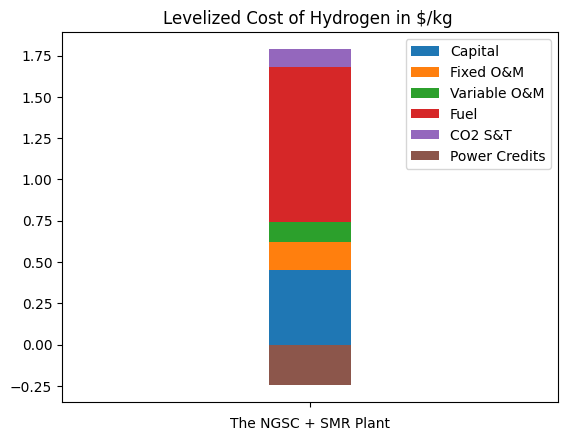

In [14]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
df = lcoh.T.drop('Total', axis = 1)
df['The NGSC + SMR Plant'] = ''

df.plot(x='The NGSC + SMR Plant', kind='bar', stacked=True,
        title='Levelized Cost of Hydrogen in $/kg ',
        width = 0.1)
plt.show()


## 8. LCOH sensitivity study on various power price

create the power price list from $$ 30/MWh to $100/MWh

In [15]:
pp_list = list(range(30,100,10))
LCOH_pp_list = []
for pp in pp_list:
    power_credits = ((power_out * 24 * 365 * pp *plant.cf )/
                (res['H2 production Rate (kg/hr)']* 24 * 365 * plant.cf))
    LCOH_pp_list.append(lcoh.T['Total'] - power_credits.values)

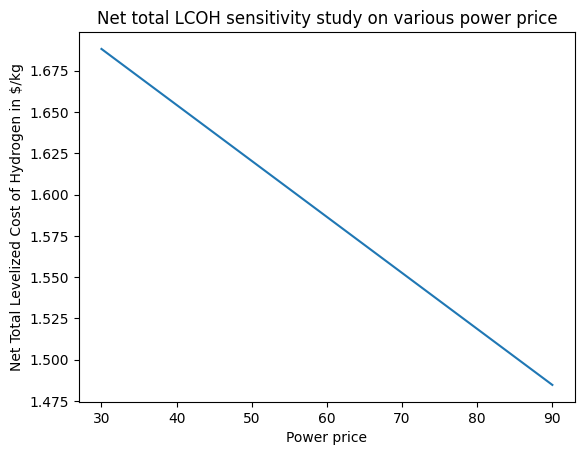

In [16]:
import matplotlib.pyplot as plt
plt.plot(pp_list, LCOH_pp_list)
plt.title('Net total LCOH sensitivity study on various power price')
plt.xlabel("Power price")
plt.ylabel('Net Total Levelized Cost of Hydrogen in $/kg')
plt.show()

## 9. LCOH sensitivity study on various fuel price

vary fuel price from 3 to 8 dollars per MMBTU

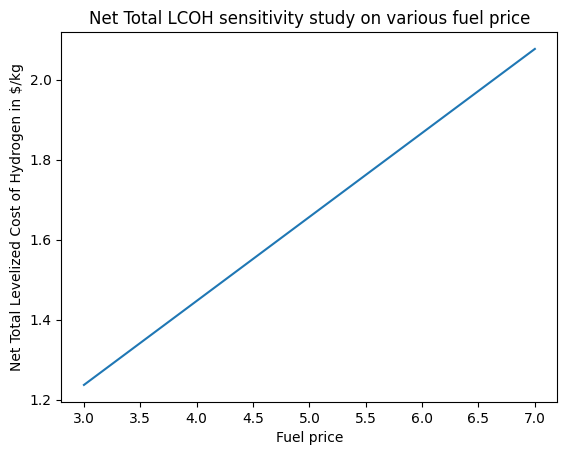

In [17]:
import matplotlib.pyplot as plt
fp_list = list(range(3,8,1))
LCOH_fp_list = []
for fp in fp_list:
    price_sen = pd.read_csv('reference/price.csv', header = 0, index_col = 0)
    price_sen.at['ng','instant'] = fp
    price_sen.to_csv('reference/price.csv')
    plant = Plant('smr_ngsc', 1)
    case = plant.type
    cf = plant.cf
    for i in range(len(read_data(plant.files()[case]))):    
        product = pd.read_csv("reference/product.csv", header= 0, index_col = [0,1])
        if case is not None: 
            product[case] = read_data(plant.files()[case])[i]
        product.loc[['co2']] = product.loc[['co2']] /1000
        product.loc[['ng']] = product.loc[['ng']] * 49565.84/1e6
        product.reset_index(inplace = True)
        product.set_index('item',inplace = True,drop = True)
        price = pd.read_csv('reference/price.csv', header = 0, index_col = 0)
        total = pd.DataFrame()
        for col in product.drop('unit', axis = 1).columns:
            for index in price.instant.index:
                total.at[index,col] = product[col][index] * price.instant[index]*24*365/1e6
    cost= cost_cal(case)
    summary = cost_sum(product,total,cost,case,cf)
    LCOH_fp = LCOH_cal(summary, product,cf)  
    power_credits = ((power_out * 24 * 365 * power_price *plant.cf )/
                (res['H2 production Rate (kg/hr)']* 24 * 365 * plant.cf))
    LCOH_fp_list.append(LCOH_fp.at['Total','Value, $/kg H2']-power_credits.values)
price_sen = pd.read_csv('reference/price.csv', header = 0, index_col = 0)
price_sen.at['ng','instant'] = 4.42
price_sen.to_csv('reference/price.csv')

plt.plot(fp_list, LCOH_fp_list)
plt.title('Net Total LCOH sensitivity study on various fuel price')
plt.xlabel("Fuel price")
plt.ylabel('Net Total Levelized Cost of Hydrogen in $/kg')
plt.show()

# 10 Summary

This notebook serves as an example of a NGSC plus SMR IES plant baseline case and its associated costing analysis. The notebook includes a step-by-step guide to building an NGSC+SMR process simulation and the attached flowsheet diagram provides a visual representation of the process. The notebook also includes testing to validate results, ensuring accuracy in the analysis. The costing analysis is completed for the baseline case using the LCOH (levelized cost of hydrogen) index, and a categorized bar chart is plotted to provide a clear visual representation of the costs. Additionally, the notebook includes a sensitivity study that explores the impact of various fuel prices and power prices on the overall cost of hydrogen production. 